<a href="https://colab.research.google.com/github/Sukyeong02/23-2-ANN/blob/main/Lecture_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./pima-indians-diabetes3.csv')

In [ ]:
df  # dataframe = 2차원의 표 형태 / series = 1차원의 벡터 형태

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
list(df.columns)

['pregnant',
 'plasma',
 'pressure',
 'thickness',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'diabetes']

0 = 정상인 사람 / 1 = 당뇨병 환자

In [ ]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


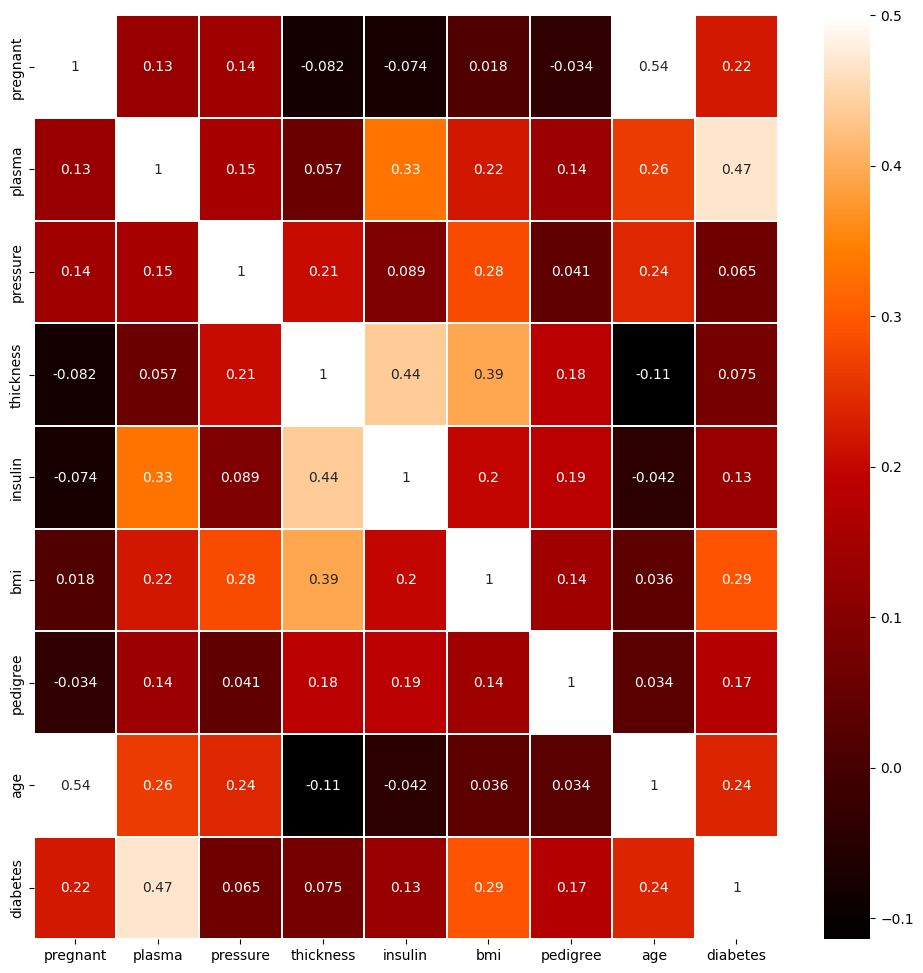

In [ ]:
colormap = plt.cm.gist_heat

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

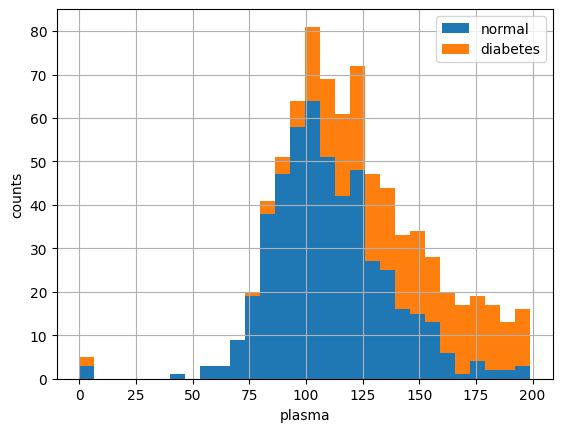

In [ ]:
# plasma와 bmi지수 적당
plt.figure()
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]],
         bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.xlabel('plasma')
plt.ylabel('counts')
plt.grid(True)
plt.legend()
plt.show()

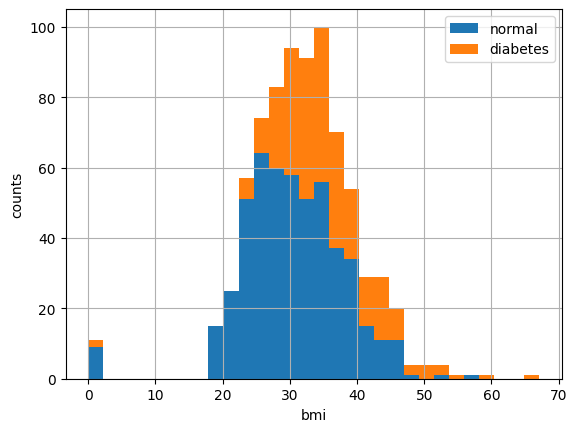

In [ ]:
plt.figure()
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]],
         bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.xlabel('bmi')
plt.ylabel('counts')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(12, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x, y, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
154/154 - 7s - loss: 3.0629 - accuracy: 0.4674 - 7s/epoch - 47ms/step
Epoch 2/100
154/154 - 0s - loss: 0.7287 - accuracy: 0.6185 - 396ms/epoch - 3ms/step
Epoch 3/100
154/154 - 0s - loss: 0.6774 - accuracy: 0.6354 - 423ms/epoch - 3ms/step
Epoch 4/100
154/154 - 0s - loss: 0.6675 - accuracy: 0.6458 - 406ms/epoch - 3ms/step
Epoch 5/100
154/154 - 0s - loss: 0.6621 - accuracy: 0.6432 - 429ms/epoch - 3ms/step
Epoch 6/100
154/154 - 0s - loss: 0.6571 - accuracy: 0.6536 - 407ms/epoch - 3ms/step
Epoch 7/100
154/154 - 0s - loss: 0.6539 - accuracy: 0.6445 - 408ms/epoch - 3ms/step
Epoch 8/100
154/154 - 0s - loss: 0.6510 - accuracy: 0.6458 - 423ms/epoch - 3ms/step
Epoch 9/100
154/154 - 0s - loss: 0.6490 - accuracy: 0.6445 - 396ms/epoch - 3ms/step
Epoch 10/100
154/154 - 0s - loss: 0.6471 - accuracy: 0.6523 - 426ms/epoch - 3ms/step
Epoch 11/100
154/154 - 0s - loss: 0.6448 - accuracy: 0.6562 - 410ms/epoch - 3ms/step
Epoch 12/100
154/154 - 0s - loss: 0.6434 - accuracy: 0.6562 - 405ms/epoch - 